In [1]:
import numpy as np
import matplotlib.pylab as plt
import SEdist
from scipy import ndimage
# image
import matplotlib.image as mpimg
img = mpimg.imread('/Users/tabel/Downloads/stinkbug.png')

def smooth_fourier_tophat(im,radius):
    # given an image [2D numpy arrays] im we smooth it with a spherical tophat of radius: radius 
    # if radius is an array we do all the smoothings and return a list of images
    radii = np.array(radius)
    res = []
    imt = np.fft.fft2(im)
    for i in radii.flatten() * 2 : # the size in .fourier_ellipsoid is specified as diameter
        imc = ndimage.fourier_ellipsoid(imt, size=i)
        imc = np.fft.ifft2(imc).real
        res.append(imc) 
    if radii.flatten().shape[0]==1:
        return res[0]
    else:
        return res

In [2]:
r = img.mean(axis=2)[0:350,100:450]
radii = [1,4,8, 16, 32, 64, 128,256]
l = smooth_fourier_tophat(r,radii)

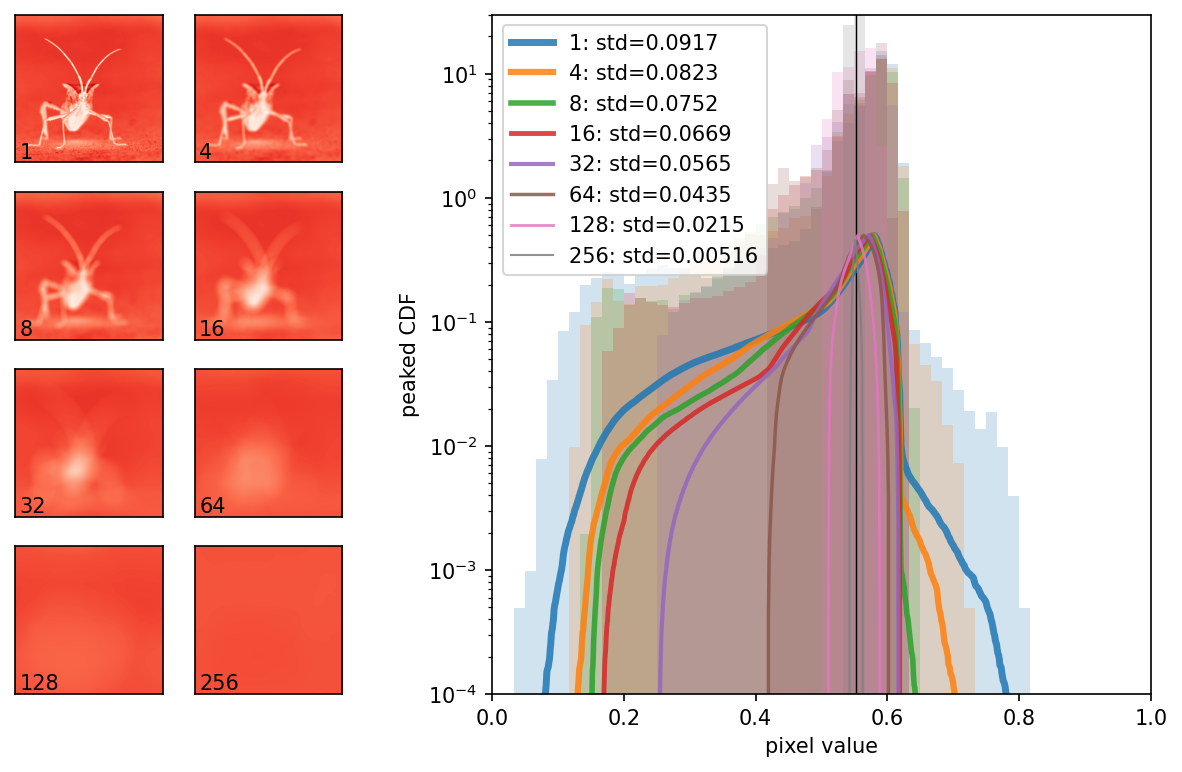

In [10]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(8.5,6),dpi=150,constrained_layout=False)

x = np.linspace(0,1,1000)

subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 2])
offsets = radii
#grid = ImageGrid(fig, 121, nrows_ncols=(3,len(l)//3+1),share_all=True,label_mode="1")
grid = subfigs[0].subplots(4,2,sharey = True)
for i, im,count in zip(grid.flatten(),l,range(len(l))):
#    print(i,im)
    ci = i.imshow(im,cmap="Reds",vmin=0.1,vmax=0.9)
    i.text(10, im.shape[1]-10, str(offsets[count]))
    i.tick_params(axis='both',which='both',labelbottom=False,bottom=False,left=False,top=False)
    i.set_yticks([])

lstd = []
ax = subfigs[1].subplots(1,1)
ax.axvline(l[0].mean(),lw=0.7,alpha=1,color="black")
for i, rc in enumerate(l):
    ser = SEdist.SE_distribution(rc.flatten(),compress="log") 
    color = next(ax._get_lines.prop_cycler)['color']
    cstd = rc.flatten().std()
    lstd.append(cstd)
    ax.plot(x, ser.pcdf(x), '-', label=str(offsets[i])+": std="+'{0:.3g}'.format(cstd), lw=(len(radii)+2-i)/3, alpha=.85,color=color)
    ax.hist(rc.flatten(),bins=60,alpha=.2,color=color,density=True,range=[0.,1.])
    ax.set_yscale("log")
ax.set_xlim([0,1])
ax.set_ylim([1e-4,30])
ax.set_xlabel("pixel value")
ax.set_ylabel("peaked CDF");
ax.legend(loc="upper left");


Text(0.5, 0, 'smoothing radius [pixels]')

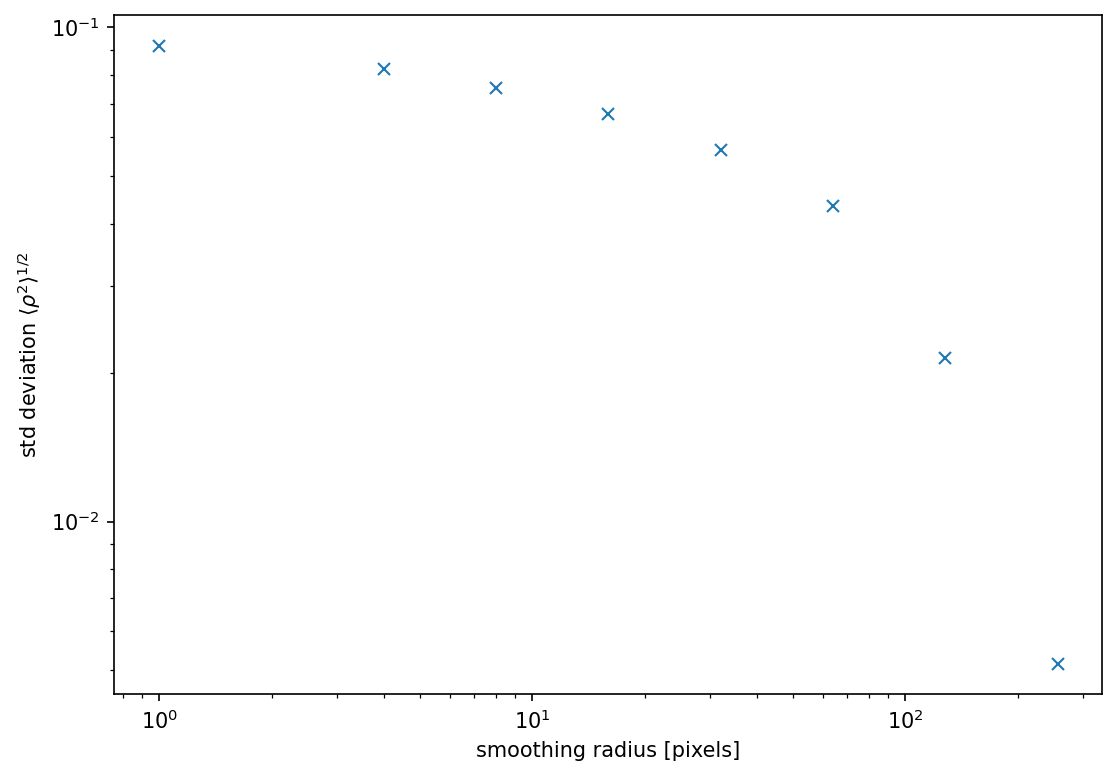

In [26]:
fig = plt.figure(figsize=(8.5,6),dpi=150,constrained_layout=False)
plt.loglog(np.array(radii),np.array(lstd),'x')
plt.ylabel(r'std deviation $\langle \rho^2 \rangle^{1/2}$')
plt.xlabel('smoothing radius [pixels]')